In [9]:
!pip install psycopg2 pandas matplotlib

In [57]:
import psycopg2
import pandas as pd

# Database connection parameters
db_params = {
    'database': 'film_rentals',  # Replace with your database name
    'user': 'postgres',         # Replace with your username
    'password': 'sameer123',    # Replace with your password
    'host': 'localhost',        # Replace with your host
    'port': '5432'              # Replace with your port
}

# SQL query
query = """
SELECT 
    f.film_id, 
    f.title AS film_name,
    fc.category_name AS film_category_name, 
    MAX(fr.rental_count) AS "TOTAL RENTAL COUNT"
FROM 
    fact_rental fr
JOIN dim_film f ON fr.film_id = f.film_id
JOIN dim_film_category fc ON fr.film_category_name = fc.category_name
GROUP BY 
    f.film_id, f.title, fc.category_name
ORDER BY 
    "TOTAL RENTAL COUNT" DESC
LIMIT 10;
"""

try:
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    df = pd.read_sql_query(query, conn)
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.
Query executed successfully. Data loaded into DataFrame:
   film_id            film_name film_category_name  TOTAL RENTAL COUNT
0      103   BUCKET BROTHERHOOD             Travel                  34
1      738     ROCKETEER MOTHER            Foreign                  33
2      382       GRIT CLOCKWORK              Games                  32
3      767        SCALAWAG DUCK              Music                  32
4      331       FORWARD TEMPLE              Games                  32
5      730  RIDGEMONT SUBMARINE                New                  32
6      489       JUGGLER HARDLY          Animation                  32
7      621         NETWORK PEAK             Family                  31
8       31        APACHE DIVINE             Family                  31
9      753      RUSH GOODFELLAS             Family                  31


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\370665445.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [59]:
df

,film_id,film_name,film_category_name,TOTAL RENTAL COUNT
0,103,BUCKET BROTHERHOOD,Travel,34
1,738,ROCKETEER MOTHER,Foreign,33
2,382,GRIT CLOCKWORK,Games,32
3,767,SCALAWAG DUCK,Music,32
4,331,FORWARD TEMPLE,Games,32
5,730,RIDGEMONT SUBMARINE,New,32
6,489,JUGGLER HARDLY,Animation,32
7,621,NETWORK PEAK,Family,31
8,31,APACHE DIVINE,Family,31
9,753,RUSH GOODFELLAS,Family,31


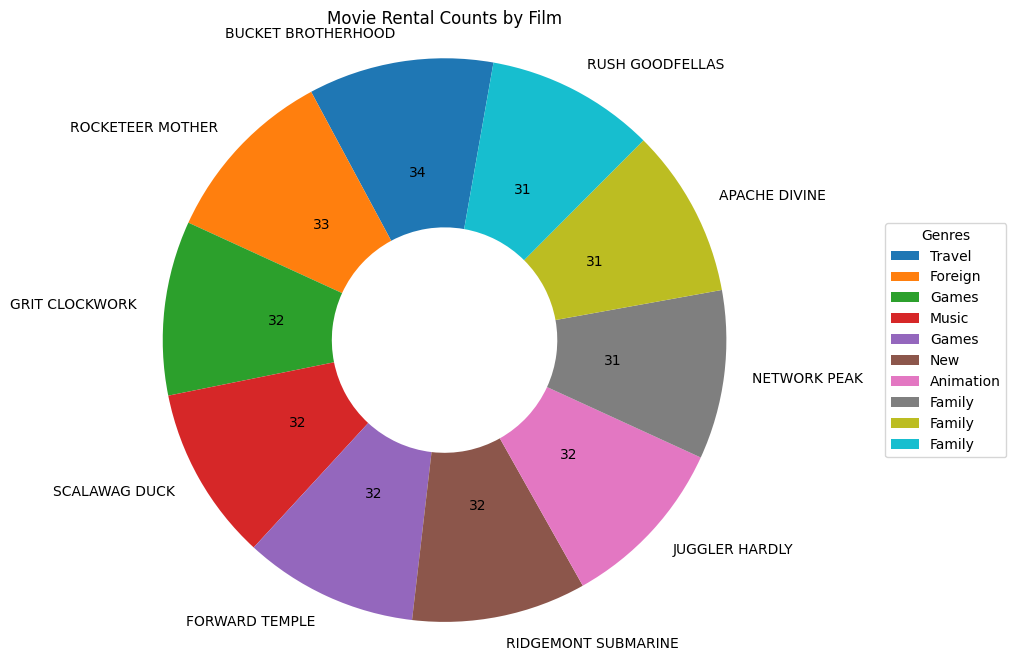

In [61]:
import matplotlib.pyplot as plt

# Data
film_names = df['film_name']
rental_counts = df['TOTAL RENTAL COUNT']
genres = df['film_category_name']

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(rental_counts, labels=film_names, autopct=lambda p: f'{int(p * sum(rental_counts) / 100)}', 
                                  startangle=80, wedgeprops={'width': 0.6})

ax.legend(wedges, genres, title="Genres", loc="center left", bbox_to_anchor=(1.2, 0.5))
ax.axis('equal')
plt.title('Movie Rental Counts by Film')

plt.show()



In [63]:
query = """
SELECT 
    film_category_name AS "Film Category/Genre",
    MAX(rental_count) AS "TOTAL RENTAL COUNT"
FROM 
    fact_rental
GROUP BY 
    film_category_name
ORDER BY 
    "TOTAL RENTAL COUNT" DESC
LIMIT 10;
"""
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    
    # Execute the query and load the results into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Display the DataFrame
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    
    # Close the connection
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.
Query executed successfully. Data loaded into DataFrame:
  Film Category/Genre  TOTAL RENTAL COUNT
0              Travel                  34
1             Foreign                  33
2               Games                  32
3               Music                  32
4           Animation                  32
5                 New                  32
6              Comedy                  31
7            Classics                  31
8         Documentary                  31
9            Children                  31


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\2997073483.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [65]:
df

,Film Category/Genre,TOTAL RENTAL COUNT
0,Travel,34
1,Foreign,33
2,Games,32
3,Music,32
4,Animation,32
5,New,32
6,Comedy,31
7,Classics,31
8,Documentary,31
9,Children,31


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\2995341810.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Film Category/Genre', y='TOTAL RENTAL COUNT', data=df, palette='viridis')


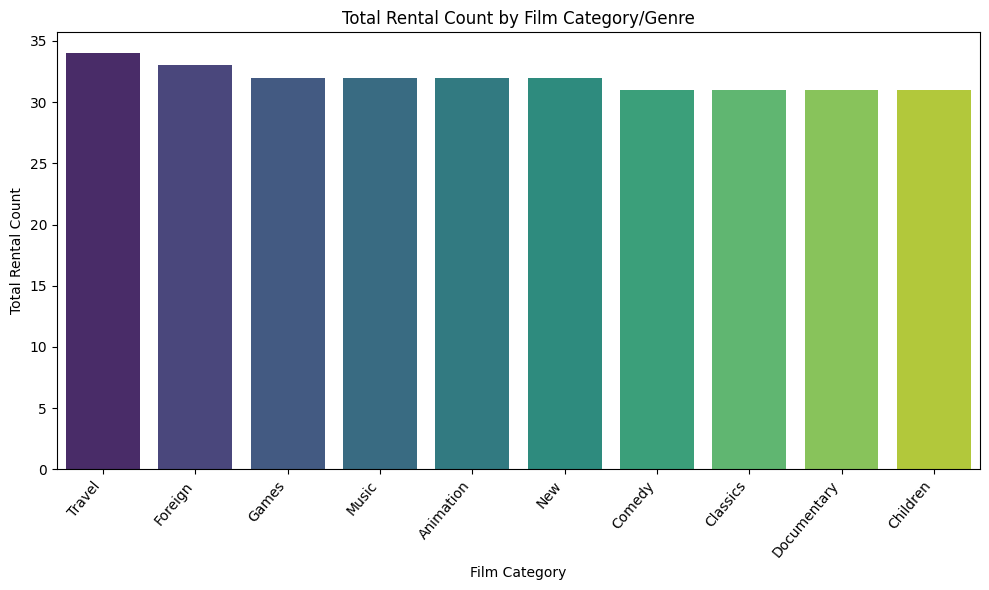

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Film Category/Genre': df['Film Category/Genre'],
    'TOTAL RENTAL COUNT': df['TOTAL RENTAL COUNT']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Film Category/Genre', y='TOTAL RENTAL COUNT', data=df, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=50, ha='right')

# Title and labels
plt.title('Total Rental Count by Film Category')
plt.xlabel('Film Category')
plt.ylabel('Total Rental Count')

# Show plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [107]:
##query 3
query = """
SELECT 
    f.rental_id,
    EXTRACT(YEAR FROM p.payment_date) AS year,
    EXTRACT(MONTH FROM p.payment_date) AS month,
    SUM(f.payment) AS total_payment_amount
FROM 
    fact_rental f
JOIN payment p ON f.payment_id = p.payment_id
GROUP BY 
    f.rental_id, year, month
ORDER BY 
    total_payment_amount DESC
LIMIT 10;
"""
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    
    # Execute the query and load the results into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Display the DataFrame
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    
    # Close the connection
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.
Query executed successfully. Data loaded into DataFrame:
   rental_id    year  month  total_payment_amount
0       4591  2022.0    7.0                 12.95
1       8831  2022.0    7.0                 11.99
2      15415  2022.0    6.0                 11.99
3        106  2022.0    3.0                 11.99
4      14763  2022.0    2.0                 11.99
5       3973  2022.0    7.0                 11.99
6       4383  2022.0    3.0                 11.99
7      11479  2022.0    2.0                 11.99
8      16040  2022.0    6.0                 11.99
9      14759  2022.0    4.0                 11.99


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\159027319.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [109]:
df

,rental_id,year,month,total_payment_amount
0,4591,2022.0,7.0,12.95
1,8831,2022.0,7.0,11.99
2,15415,2022.0,6.0,11.99
3,106,2022.0,3.0,11.99
4,14763,2022.0,2.0,11.99
5,3973,2022.0,7.0,11.99
6,4383,2022.0,3.0,11.99
7,11479,2022.0,2.0,11.99
8,16040,2022.0,6.0,11.99
9,14759,2022.0,4.0,11.99


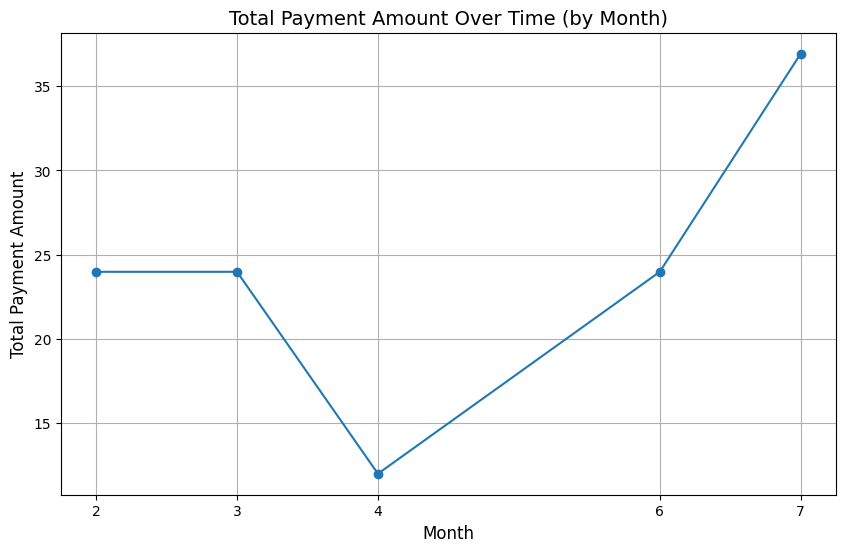

In [111]:

# Data
data = {
    'rental_id': df['rental_id'],
    'year': df['year'],
    'month': df['month'],
    'total_payment_amount': df['total_payment_amount']
}

df = pd.DataFrame(data)

# Group by year and month, and sum the total payment amount
df_grouped = df.groupby(['year', 'month'], as_index=False)['total_payment_amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['month'], df_grouped['total_payment_amount'], marker='o')
plt.title('Total Payment Amount Over Time (by Month)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Payment Amount', fontsize=12)
plt.xticks(df_grouped['month'])
plt.grid(True)
plt.show()


In [89]:
#QUERY 4

query = """
SELECT
EXTRACT(YEAR FROM r.rental_date) AS year,
to_char(r.rental_date, 'Month') AS month,
COUNT(f.rental_id) AS "Number of Rentals for the Month"
FROM fact_rental f
JOIN rental r
ON r.rental_id = f.rental_id
GROUP BY year, month
ORDER BY "Number of Rentals for the Month";
"""
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    
    # Execute the query and load the results into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Display the DataFrame
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    
    # Close the connection
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.
Query executed successfully. Data loaded into DataFrame:
     year      month  Number of Rentals for the Month
0  2022.0  February                               182
1  2022.0  May                                   1156
2  2022.0  June                                  2311
3  2022.0  August                                5530
4  2022.0  July                                  6870


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\2081822438.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [91]:
df.columns

Index(['year', 'month', 'Number of Rentals for the Month'], dtype='object')

C:\Users\samee\AppData\Local\Temp\ipykernel_35716\2649122355.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Number of Rentals for the Month', data=df, palette='viridis')


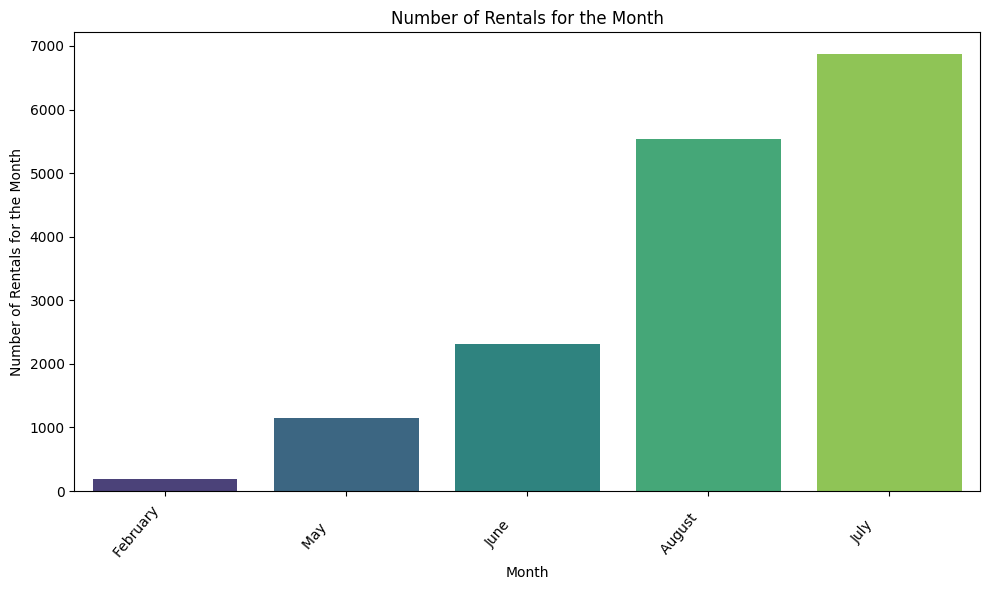

In [93]:
data = {
    'Month': df['month'],
    'Number of Rentals for the Month': df['Number of Rentals for the Month']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Number of Rentals for the Month', data=df, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=50, ha='right')

# Title and labels
plt.title('Number of Rentals for the Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals for the Month')

# Show plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()


In [95]:
#QUERY 5

query = """
SELECT 
    EXTRACT(YEAR FROM p.payment_date) AS year,
    TO_CHAR(p.payment_date, 'MON') AS month,
    SUM(fr.payment) AS "Sum of all rental payment amount for the Month"
FROM 
    fact_rental fr
JOIN 
    payment p ON fr.payment_id = p.payment_id
GROUP BY 
    year, month
ORDER BY 
    "Sum of all rental payment amount for the Month";
"""
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    
    # Execute the query and load the results into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Display the DataFrame
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    
    # Close the connection
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.
Query executed successfully. Data loaded into DataFrame:
     year month  Sum of all rental payment amount for the Month
0  2022.0   JAN                                         3176.57
1  2022.0   JUL                                         9659.77
2  2022.0   FEB                                        10172.96
3  2022.0   APR                                        10772.52
4  2022.0   JUN                                        10917.49
5  2022.0   MAY                                        11316.31
6  2022.0   MAR                                        11400.89


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\3298081918.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [97]:
df

,year,month,Sum of all rental payment amount for the Month
0,2022.0,JAN,3176.57
1,2022.0,JUL,9659.77
2,2022.0,FEB,10172.96
3,2022.0,APR,10772.52
4,2022.0,JUN,10917.49
5,2022.0,MAY,11316.31
6,2022.0,MAR,11400.89


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\2145396386.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sum of all rental payment amount for the Month', data=df, palette='viridis')


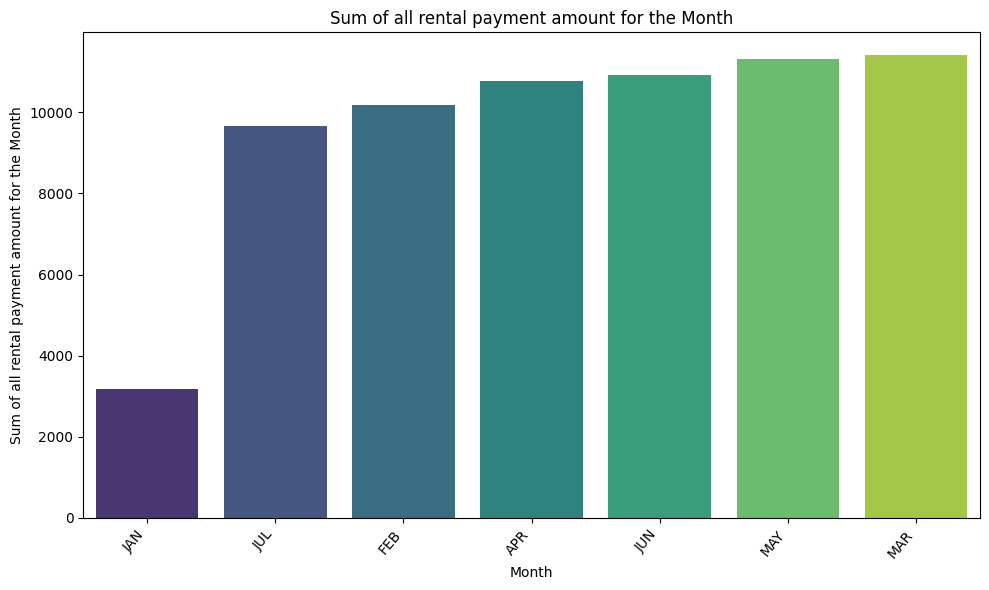

In [99]:
data = {
    'Month': df['month'],
    'Sum of all rental payment amount for the Month': df['Sum of all rental payment amount for the Month']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sum of all rental payment amount for the Month', data=df, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=50, ha='right')

# Title and labels
plt.title('Sum of all rental payment amount for the Month')
plt.xlabel('Month')
plt.ylabel('Sum of all rental payment amount for the Month')

# Show plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [101]:
#QUERY 6

query = """
SELECT 
    EXTRACT(YEAR FROM p.payment_date) AS year,
    TO_CHAR(p.payment_date, 'MON') AS month,
    ROUND(AVG(fr.payment),2) AS "Average of all rental payment amount for the Month"
FROM 
    fact_rental fr
JOIN 
    payment p ON fr.payment_id = p.payment_id
GROUP BY 
    year, month
ORDER BY 
    "Average of all rental payment amount for the Month";
"""
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    
    # Execute the query and load the results into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Display the DataFrame
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    
    # Close the connection
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.
Query executed successfully. Data loaded into DataFrame:
     year month  Average of all rental payment amount for the Month
0  2022.0   JUN                                               4.12 
1  2022.0   JUL                                               4.16 
2  2022.0   MAR                                               4.21 
3  2022.0   MAY                                               4.23 
4  2022.0   APR                                               4.23 
5  2022.0   FEB                                               4.24 
6  2022.0   JAN                                               4.27 


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\2895434574.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [103]:
df

,year,month,Average of all rental payment amount for the Month
0,2022.0,JUN,4.12
1,2022.0,JUL,4.16
2,2022.0,MAR,4.21
3,2022.0,MAY,4.23
4,2022.0,APR,4.23
5,2022.0,FEB,4.24
6,2022.0,JAN,4.27


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\3478130485.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Average of all rental payment amount for the Month', data=df, palette='viridis')


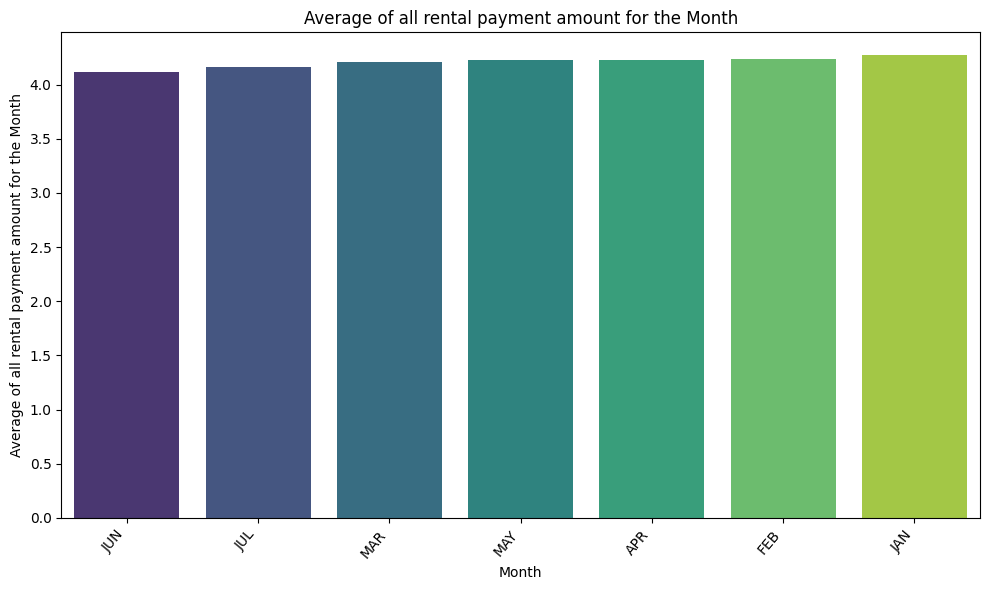

In [105]:
data = {
    'Month': df['month'],
    'Average of all rental payment amount for the Month': df['Average of all rental payment amount for the Month']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Average of all rental payment amount for the Month', data=df, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=50, ha='right')

# Title and labels
plt.title('Average of all rental payment amount for the Month')
plt.xlabel('Month')
plt.ylabel('Average of all rental payment amount for the Month')

# Show plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [113]:
#query 7
#QUERY 6

query = """
WITH daily_totals AS (
    SELECT 
        EXTRACT(YEAR FROM p.payment_date) AS year,
        EXTRACT(MONTH FROM p.payment_date) AS month,
        EXTRACT(DAY FROM p.payment_date) AS day,
        SUM(p.amount) AS total_payment
    FROM 
        payment p
    GROUP BY 
        year, month, day
),
hottest_days AS (
    SELECT 
        year,
        month,
        day,
        total_payment
    FROM 
        daily_totals d
    WHERE 
        total_payment = (
            SELECT MAX(total_payment)
            FROM daily_totals
            WHERE year = d.year AND month = d.month
        )
)
SELECT 
    year,
    month,
    day,
    total_payment
FROM 
    hottest_days
ORDER BY 
    year, month, day;

"""
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    
    # Execute the query and load the results into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Display the DataFrame
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    
    # Close the connection
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.
Query executed successfully. Data loaded into DataFrame:
     year  month   day  total_payment
0  2022.0    1.0  29.0         417.04
1  2022.0    2.0  18.0         492.94
2  2022.0    3.0  24.0         488.86
3  2022.0    4.0  12.0         456.98
4  2022.0    5.0  26.0         463.04
5  2022.0    6.0   6.0         434.97
6  2022.0    7.0   8.0         448.00


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\1482477353.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [115]:
df

,year,month,day,total_payment
0,2022.0,1.0,29.0,417.04
1,2022.0,2.0,18.0,492.94
2,2022.0,3.0,24.0,488.86
3,2022.0,4.0,12.0,456.98
4,2022.0,5.0,26.0,463.04
5,2022.0,6.0,6.0,434.97
6,2022.0,7.0,8.0,448.00


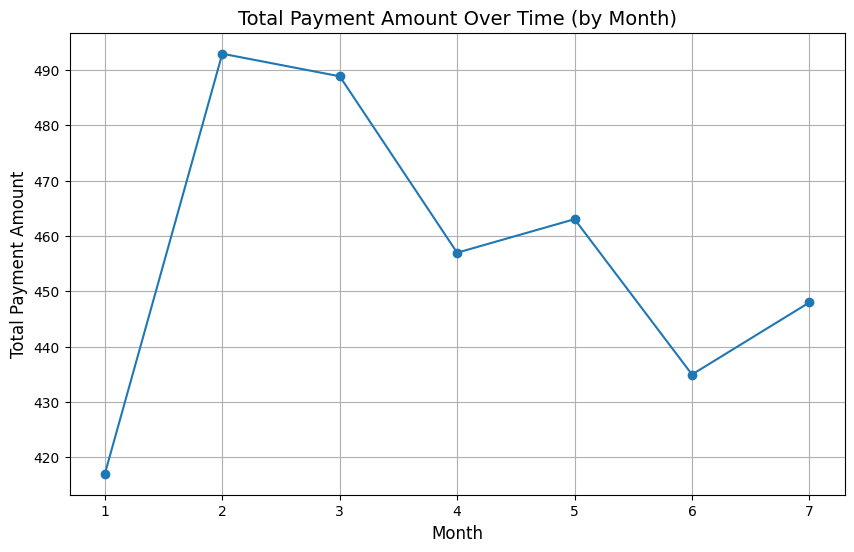

In [119]:
# Data
data = {
    'year': df['year'],
    'month': df['month'],
    'day': df['day'],
    'total_payment_amount': df['total_payment']
}

df = pd.DataFrame(data)

# Group by year and month, and sum the total payment amount
df_grouped = df.groupby(['year', 'month', 'day'], as_index=False)['total_payment_amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['month'], df_grouped['total_payment_amount'], marker='o')
plt.title('Total Payment Amount Over Time (by Month)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Payment Amount', fontsize=12)
plt.xticks(df_grouped['month'])
plt.grid(True)
plt.show()


In [121]:
query = """
WITH monthly_customer_totals AS (
    SELECT 
        EXTRACT(YEAR FROM p.payment_date) AS year,
        EXTRACT(MONTH FROM p.payment_date) AS month,
        c.first_name || ' ' || c.last_name AS customer_name,
        SUM(p.amount) AS total_payment
    FROM 
        payment p
    JOIN 
        dim_customer c ON p.customer_id = c.customer_id
    GROUP BY 
        year, month, customer_name
),
highest_paying_customers AS (
    SELECT 
        year,
        month,
        customer_name,
        total_payment
    FROM 
        monthly_customer_totals mct
    WHERE 
        total_payment = (
            SELECT MAX(total_payment)
            FROM monthly_customer_totals
            WHERE year = mct.year AND month = mct.month
        )
)
SELECT 
    year,
    month,
    customer_name,
    total_payment
FROM 
    highest_paying_customers
ORDER BY 
    year, month;

"""
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    print("Database connection successful.")
    
    # Execute the query and load the results into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)
    
    # Display the DataFrame
    print("Query executed successfully. Data loaded into DataFrame:")
    print(df)
    
    # Close the connection
    conn.close()

except Exception as e:
    print(f"Error: {e}")

Database connection successful.


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\1430819939.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Query executed successfully. Data loaded into DataFrame:
     year  month    customer_name  total_payment
0  2022.0    1.0    MARION SNYDER          26.94
1  2022.0    2.0      ROY WHITING          55.90
2  2022.0    3.0        KARL SEAL          62.89
3  2022.0    4.0     NORA HERRERA          57.89
4  2022.0    5.0    TONYA CHAPMAN          64.87
5  2022.0    6.0    DAVE GARDINER          58.88
6  2022.0    7.0  BESSIE MORRISON          51.89


In [133]:
df

,Total Payment,Customer Name
0,26.94,MARION SNYDER
1,55.90,ROY WHITING
2,62.89,KARL SEAL
3,57.89,NORA HERRERA
4,64.87,TONYA CHAPMAN
5,58.88,DAVE GARDINER
6,51.89,BESSIE MORRISON


C:\Users\samee\AppData\Local\Temp\ipykernel_35716\3092697920.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Name', y='Total Payment', data=df, palette='viridis')


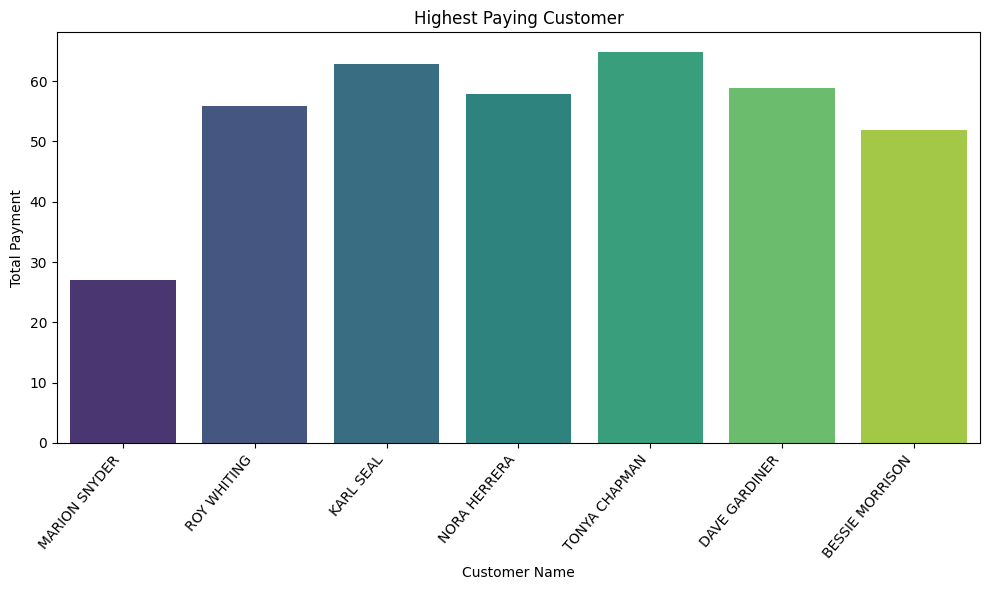

In [135]:
data = {
    'Total Payment': df['Total Payment'],
    'Customer Name': df['Customer Name']
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Name', y='Total Payment', data=df, palette='viridis')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=50, ha='right')

# Title and labels
plt.title('Highest Paying Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total Payment')

# Show plot
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()